# Data Science & Business Analytics intern at The Sparks Foundation

## Task - 2 Prediction Using Unsupervised ML

## Author : Alok Yadav

#### iris dataset is unlabelled dataset which have four features sepal lentgth, sepal width, petal length and petal width in this task.
-  i used k-means cluster (unsupervised ml algorithm) for getting different type of species.
-  i used elbow method to get optimal number of cluster.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## * Importing Necessary Libraries *

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## * Loading the iris dataset *

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
# converting data into dataframe
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## * Data Exploration *

In [5]:
#  lets check dimension of data
iris_df.shape

(150, 4)

In [6]:
# Get quick statistical information
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### As we know that iris dataset is inbuilt dataset and already cleaned so no need to check null value, duplicates etc.

## *   Visualizing dataset *

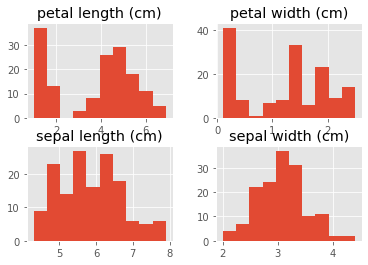

In [7]:
# lets see how each column are distributed
plt.style.use('ggplot')
iris_df.hist()
plt.show()

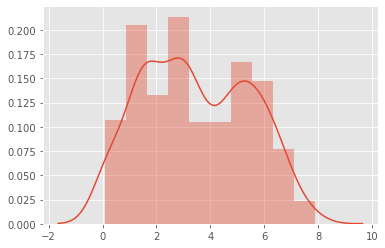

In [8]:
sns.distplot(iris_df)

## * Elbow method *

In cluster analysis, the elbow method is a heuristic used in determining the number of 
clusters in a data set. The method consists of plotting the explained variation as a
function of the number of clusters, and picking the elbow of the curve as the number of clusters to use

In [9]:
# Preparing dataset
x = iris_df.iloc[:,[0,1,2,3]].values

# Using Elbow method to find optimal number of cluster
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init ='k-means++',
                   max_iter =300,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

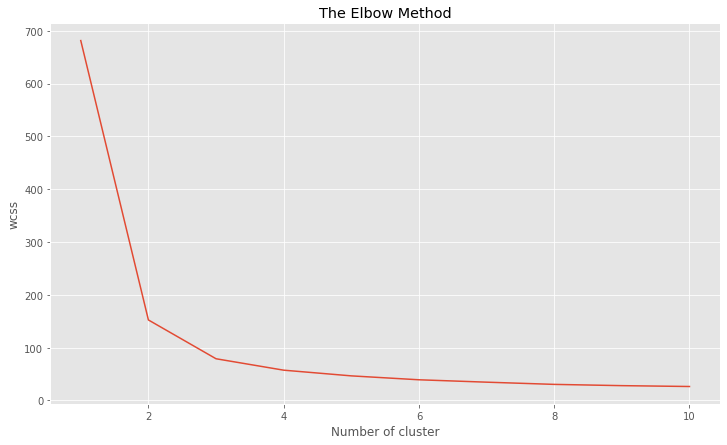

In [10]:
# plotting the result onto line graph 
# we can observe 'The Elbow'
plt.figure(figsize=(12,7))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

#### From above line graph we can clearly see that at point 3 wcss graph does't decrease significantly hence according to elbow method the optimal number of cluster is 3.

## * Fitting the model *

In [11]:
# Applying k-means to the iris dataset
kmeans =KMeans(n_clusters=3,init ='k-means++',max_iter =300,n_init=10)
y_kmeans = kmeans.fit_predict(x)

## * Visualizing the clusters *

 - Based on Sepal length and width

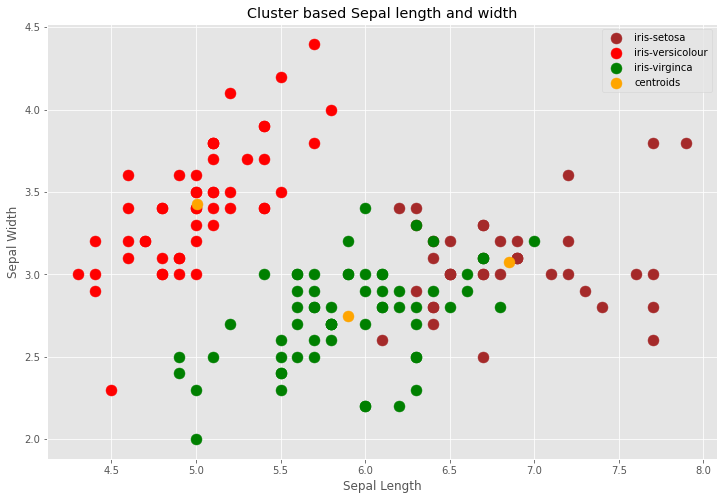

In [12]:
# visualising the clusters based on Sepal length and width
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans ==0,1],
            s =120,c ='brown',label='iris-setosa')

plt.scatter(x[y_kmeans == 1,0],x[y_kmeans ==1,1],
            s =120,c ='red',label='iris-versicolour')

plt.scatter(x[y_kmeans == 2,0],x[y_kmeans ==2,1],
            s =120,c ='green',label='iris-virginca')
plt.title("Cluster based Sepal length and width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s= 120,c ="orange",label ="centroids")
plt.legend()


******************************************************************************************************************************

- Based on Petal length and width

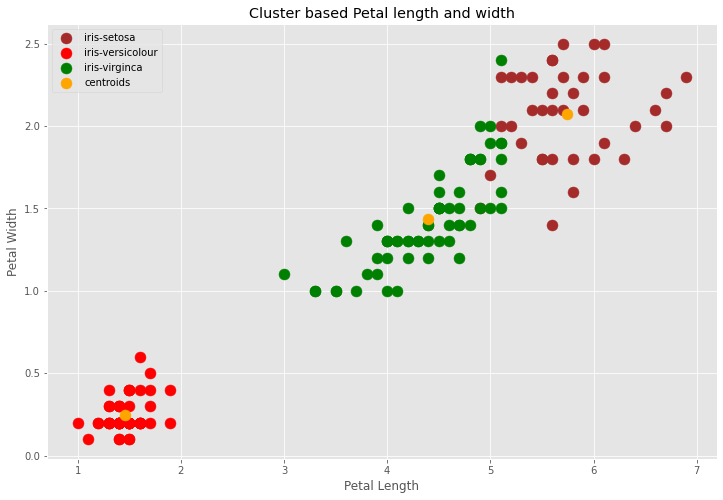

In [13]:
# visualising the clusters based on Petal length and width

plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0,2],x[y_kmeans ==0,3],
            s =120,c ='brown',label='iris-setosa')

plt.scatter(x[y_kmeans == 1,2],x[y_kmeans ==1,3],
            s =120,c ='red',label='iris-versicolour')

plt.scatter(x[y_kmeans == 2,2],x[y_kmeans ==2,3],
            s =120,c ='green',label='iris-virginca')
plt.title("Cluster based Petal length and width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],
          s= 120,c ="orange",label ="centroids")
plt.legend()

# Task-2 Completed